In [1]:
import json
import os
from typing import List

from matplotlib import pyplot as plt

model_ids: List[str] = [
    'LinearRegression2021_11_07_15_37_54_234836',
    'SimpleNeuralNet2021_11_11_12_48_09_057730',
    'SimpleNeuralNet2021_11_11_13_02_05_443536',
    'TimeSeriesTransformer2021_12_01_13_57_34_315961',
    'TimeSeriesTransformer2021_12_06_20_42_53_955354',
    'TimeSeriesTransformer2021_12_03_19_43_43_470642'

]
labels = ['Linear Regression', 'NeuralNet (1 Layer)', 'NeuralNet (2 Layers)', 'Transformer', 'Transformer2',
          'Transformer (1 step ahead)']
assert len(model_ids) == len(labels)

experiments = []
for model_id in model_ids:
    with open(os.path.join('..', 'experiments', 'archive', model_id + '.json')) as file:
        experiment_data = json.load(file)
        experiments.append(experiment_data)
        print(experiment_data)

{'experimentName': 'LinearRegression2021_11_07_15_37_54_234836', 'modelType': 'LinearRegression', 'modelWrapper': 'LinearRegression()', 'trainingConfig': {'learning_rate': 3e-06, 'max_epochs': 2000, 'use_early_stopping': True, 'early_stopping_patience': 10}, 'trainingReport': None, 'evaluation': {'total_mape_loss': 0.03090597130358219, 'total_mase_loss': 0.4864218235015869, 'mape_losses_by_prediction_variable': {'0': 0.014328932389616966, '1': 0.019565699622035027, '2': 0.02269362471997738, '3': 0.024892868474125862, '4': 0.02671746164560318, '5': 0.028333764523267746, '6': 0.029515236616134644, '7': 0.030485525727272034, '8': 0.031386662274599075, '9': 0.03211939334869385, '10': 0.03282686695456505, '11': 0.033350709825754166, '12': 0.033799488097429276, '13': 0.034222617745399475, '14': 0.03452039510011673, '15': 0.03467625379562378, '16': 0.0347055085003376, '17': 0.03474361449480057, '18': 0.034744568169116974, '19': 0.03475086763501167, '20': 0.034764986485242844, '21': 0.03479516

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Compare the average losses

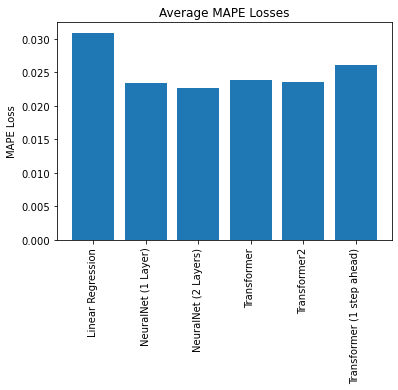

In [2]:
def create_loss_comparison_diagram(losses: List[float], title: str, bar_names: List[str], y_axis_label: str) -> None:
    """
    Creates a bar diagram which compares the losses of different models
    :param losses: the loss of each model to plot
    :param title: the name of the diagram
    :param bar_names: the name of each bar (should identify the model)
    :param y_axis_label: the name of the y axis
    """
    assert len(losses) == len(bar_names)
    plt.bar(bar_names, losses)
    plt.xticks(rotation='vertical')
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.show()


mape_losses = [experiment['evaluation']['total_mape_loss'] for experiment in experiments]
create_loss_comparison_diagram(mape_losses, 'Average MAPE Losses', labels, 'MAPE Loss')

Compare the losses by prediction variable:

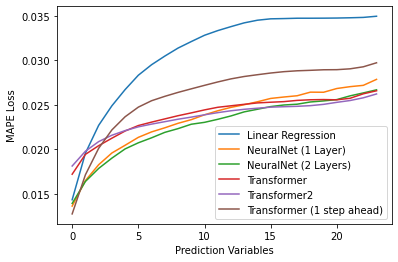

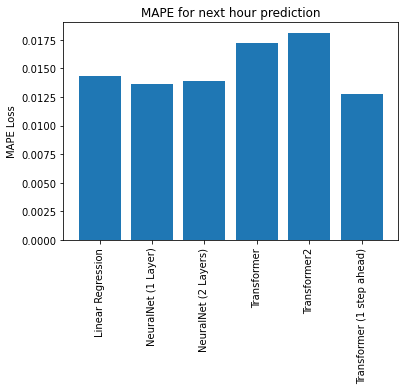

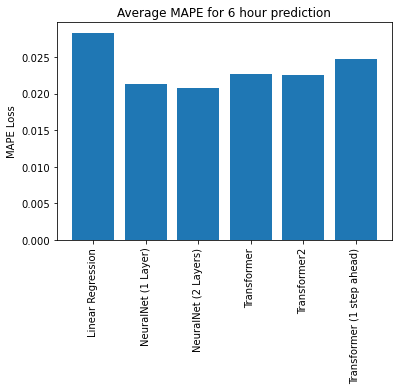

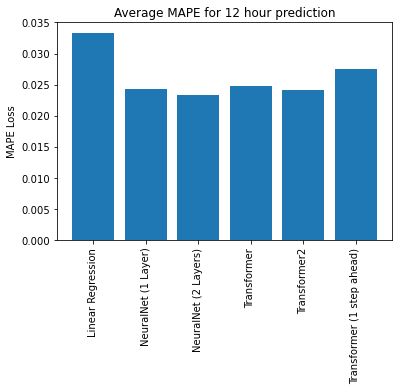

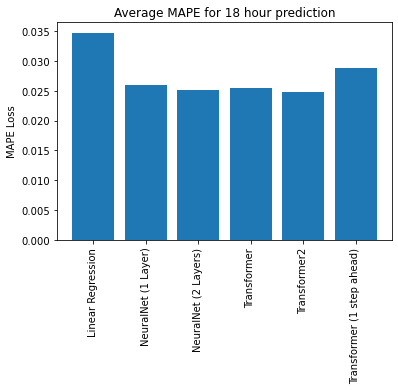

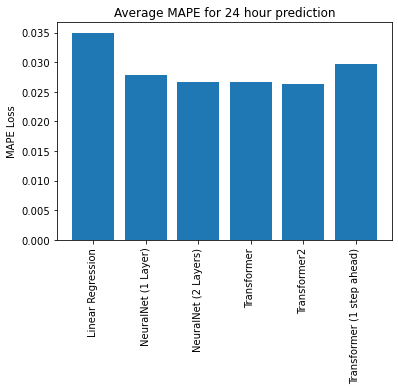

In [3]:
# Compare over all variables
fig = plt.figure()
next_hour_mape_losses = []
mape_losses_6_hours = []
mape_losses_12_hours = []
mape_losses_18_hours = []
mape_losses_24_hours = []
for index, experiment in enumerate(experiments):
    mape_losses_by_predicted_variable = []
    for variable in experiment['evaluation']['mape_losses_by_prediction_variable']:
        mape_loss = experiment['evaluation']['mape_losses_by_prediction_variable'][variable]
        mape_losses_by_predicted_variable.append(mape_loss)
        if variable == '0':
            next_hour_mape_losses.append(mape_loss)
        elif variable == '5':
            mape_losses_6_hours.append(mape_loss)
        elif variable == '11':
            mape_losses_12_hours.append(mape_loss)
        elif variable == '17':
            mape_losses_18_hours.append(mape_loss)
        elif variable == '23':
            mape_losses_24_hours.append(mape_loss)
    plt.plot(mape_losses_by_predicted_variable, label=labels[index])
plt.xlabel('Prediction Variables')
plt.ylabel('MAPE Loss')
plt.legend(loc='lower right')
plt.show()

# Compare over single variables
create_loss_comparison_diagram(next_hour_mape_losses, 'MAPE for next hour prediction', labels, 'MAPE Loss')
create_loss_comparison_diagram(mape_losses_6_hours, 'Average MAPE for 6 hour prediction', labels, 'MAPE Loss')
create_loss_comparison_diagram(mape_losses_12_hours, 'Average MAPE for 12 hour prediction', labels, 'MAPE Loss')
create_loss_comparison_diagram(mape_losses_18_hours, 'Average MAPE for 18 hour prediction', labels, 'MAPE Loss')
create_loss_comparison_diagram(mape_losses_24_hours, 'Average MAPE for 24 hour prediction', labels, 'MAPE Loss')


Show the training processes:

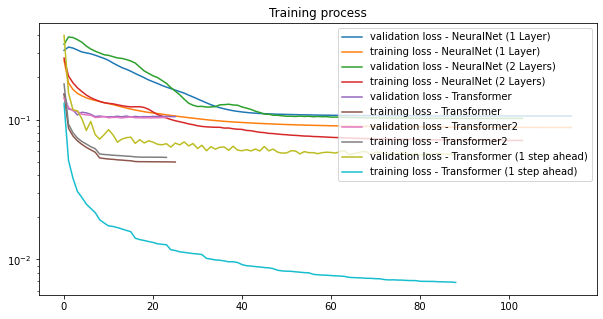

In [4]:
fig = plt.figure(figsize=(10, 5))
for index, experiment in enumerate(experiments):
    if 'trainingReport' in experiment and experiment['trainingReport']:
        epochs = experiment['trainingReport']['epochs']
        validation_losses = [epoch['validationLoss'] for epoch in epochs]
        training_losses = [epoch['trainingLoss'] for epoch in epochs]
        name = labels[index]
        plt.plot(validation_losses, label='validation loss - ' + name)
        plt.plot(training_losses, label='training loss - ' + name)
        plt.legend(loc='upper right')
        plt.yscale('log')
        plt.title('Training process')
plt.show()